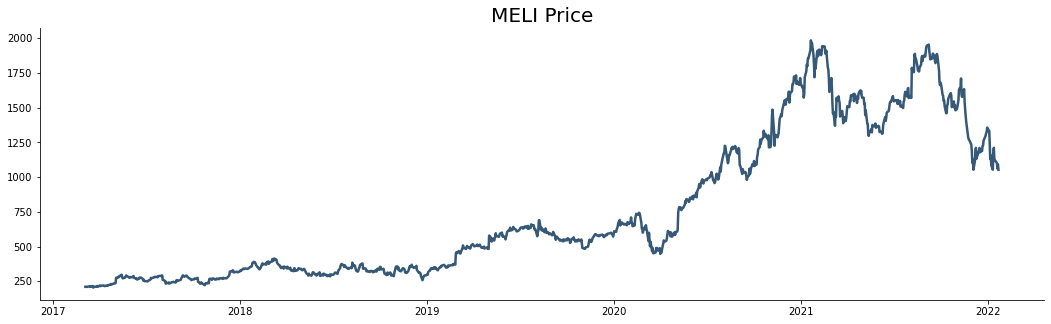

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('MELI.csv', index_col='Date', parse_dates=True)

# Visualize
plt.title('MELI Price', size=20)
plt.plot(df);

In [2]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [3]:
df

,MELI
Date,
2017-03-06,210.77
2017-03-07,211.30
2017-03-08,209.13
2017-03-09,209.38
2017-03-10,211.29
...,...
2022-01-14,1122.74
2022-01-18,1100.75
2022-01-19,1060.94


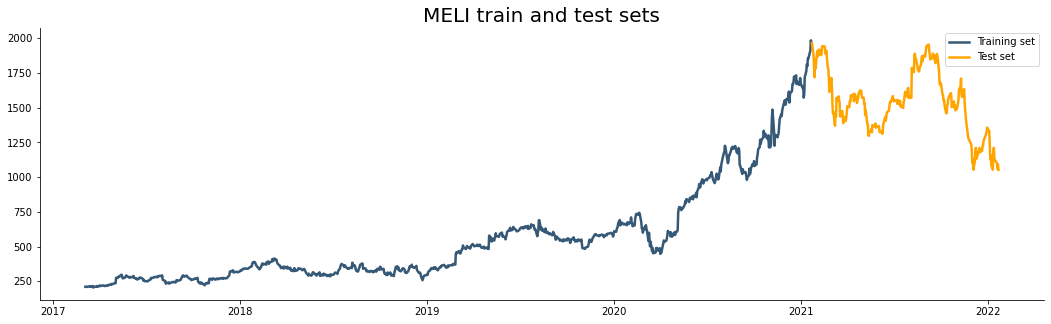

In [4]:
test_size = 253


df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('MELI train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [5]:
from fbprophet import Prophet as proph

In [6]:
df_train

,MELI
Date,
2017-03-06,210.77
2017-03-07,211.30
2017-03-08,209.13
2017-03-09,209.38
2017-03-10,211.29
...,...
2021-01-14,1852.53
2021-01-15,1851.78
2021-01-19,1913.21


In [7]:
df_train.reset_index(inplace=True)

In [8]:
df_test

,MELI
Date,
2021-01-22,1965.05
2021-01-25,1880.00
2021-01-26,1807.74
2021-01-27,1718.70
2021-01-28,1844.73
...,...
2022-01-14,1122.74
2022-01-18,1100.75
2022-01-19,1060.94


In [9]:
df_test.reset_index(inplace=True)

In [10]:
# Rename the columns [Date,AAPL] to [ds, y]

ts = df_train

ts = df_train.rename(columns={'Date': 'ds',
                        'MELI': 'y'})

ts_test = df_test.rename(columns={'Date': 'ds',
                        'MELI': 'y'})
ts.head(5)


,ds,y
0,2017-03-06,210.77
1,2017-03-07,211.30
2,2017-03-08,209.13
3,2017-03-09,209.38
4,2017-03-10,211.29


In [11]:
x_test = ts_test[['ds']]

In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model = proph(interval_width=0.95,daily_seasonality=True)

In [13]:
# Fit the timeseries into Model
Model.fit(ts)

In [14]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates = Model.make_future_dataframe(periods=759, freq='D')
future_dates.tail()


,ds
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18
1736,2023-02-19


In [15]:
future_dates

,ds
0,2017-03-06
1,2017-03-07
2,2017-03-08
3,2017-03-09
4,2017-03-10
...,...
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18


In [16]:
future_dates= future_dates.loc[future_dates['ds'] >= '2021-01-22']

In [17]:
x_test = pd.DataFrame(x_test)

In [18]:
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [19]:
# Predict the values for future dates and take the head of forecast

predicitons = Model.predict(x_test)


In [20]:
forecast = Model.predict(future_dates)

In [21]:
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
754,2023-02-15,4840.885019,2909.076956,6765.297024,2841.932851,6746.662432,30.724463,30.724463,30.724463,-7.003147,...,0.392353,0.392353,0.392353,37.335257,37.335257,37.335257,0.0,0.0,0.0,4871.609482
755,2023-02-16,4844.981752,2860.851878,6740.682604,2842.506557,6753.657643,32.302033,32.302033,32.302033,-7.003147,...,0.270528,0.270528,0.270528,39.034652,39.034652,39.034652,0.0,0.0,0.0,4877.283785
756,2023-02-17,4849.078485,2898.679003,6800.372459,2844.174153,6760.652853,34.715542,34.715542,34.715542,-7.003147,...,0.786239,0.786239,0.786239,40.932450,40.932450,40.932450,0.0,0.0,0.0,4883.794027
757,2023-02-18,4853.175218,2849.140615,6817.847687,2846.102136,6767.646901,36.838248,36.838248,36.838248,-7.003147,...,0.875393,0.875393,0.875393,42.966003,42.966003,42.966003,0.0,0.0,0.0,4890.013466
758,2023-02-19,4857.271950,2914.146062,6807.080761,2848.030118,6774.629796,38.940271,38.940271,38.940271,-7.003147,...,0.875393,0.875393,0.875393,45.068025,45.068025,45.068025,0.0,0.0,0.0,4896.212222


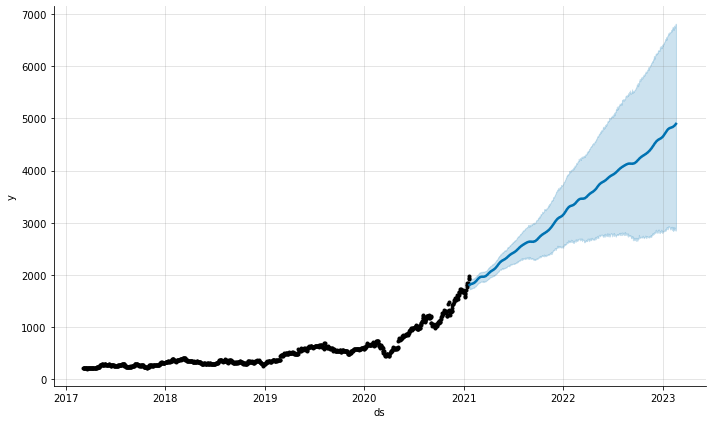

In [22]:
# Use prophet's plot function to plot the predictions

Model.plot(forecast, uncertainty=True)
plt.show()

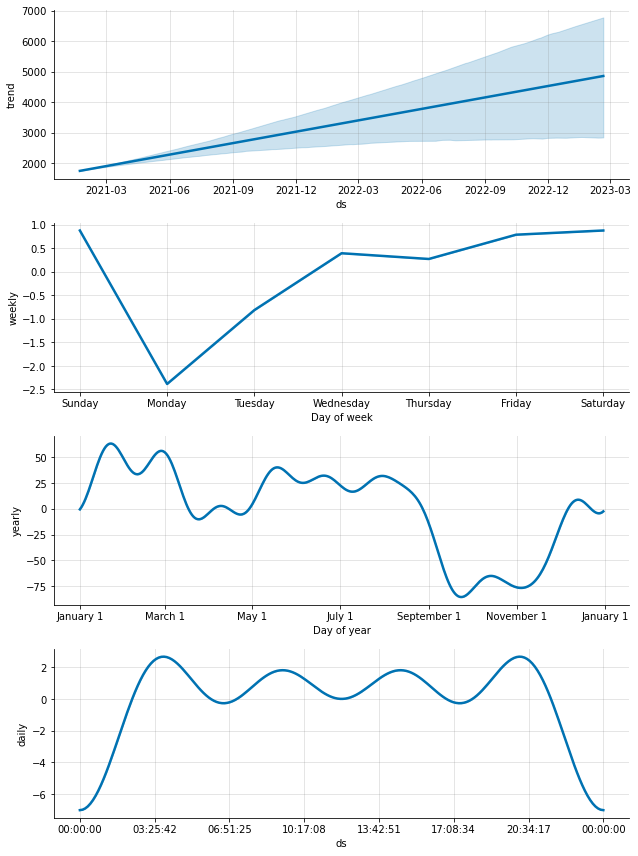

In [23]:
Model.plot_components(forecast)
plt.show()

In [24]:
df_test = pd.concat([df_test,predicitons], axis=1)
df_test

,Date,MELI,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,1965.05,2021-01-22,1751.948474,1722.920484,1898.605097,1751.948474,1751.948474,56.999174,56.999174,...,0.786239,0.786239,0.786239,63.216082,63.216082,63.216082,0.0,0.0,0.0,1808.947649
1,2021-01-25,1880.00,2021-01-25,1764.238673,1730.130392,1906.977895,1763.937422,1764.303816,52.384661,52.384661,...,-2.384091,-2.384091,-2.384091,61.771899,61.771899,61.771899,0.0,0.0,0.0,1816.623334
2,2021-01-26,1807.74,2021-01-26,1768.335406,1740.431441,1912.885567,1767.766505,1768.744211,52.607172,52.607172,...,-0.815816,-0.815816,-0.815816,60.426134,60.426134,60.426134,0.0,0.0,0.0,1820.942577
3,2021-01-27,1718.70,2021-01-27,1772.432139,1737.933461,1908.280922,1771.340332,1773.259797,52.112558,52.112558,...,0.392353,0.392353,0.392353,58.723351,58.723351,58.723351,0.0,0.0,0.0,1824.544696
4,2021-01-28,1844.73,2021-01-28,1776.528871,1742.344145,1915.291182,1775.069128,1777.732785,49.988376,49.988376,...,0.270528,0.270528,0.270528,56.720994,56.720994,56.720994,0.0,0.0,0.0,1826.517247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,1122.74,2022-01-14,3214.482090,2567.521845,3859.507617,2536.055458,3811.923687,38.925062,38.925062,...,0.786239,0.786239,0.786239,45.141970,45.141970,45.141970,0.0,0.0,0.0,3253.407152
249,2022-01-18,1100.75,2022-01-18,3230.869022,2565.392564,3906.390342,2540.997700,3832.367642,49.872513,49.872513,...,-0.815816,-0.815816,-0.815816,57.691476,57.691476,57.691476,0.0,0.0,0.0,3280.741535
250,2022-01-19,1060.94,2022-01-19,3234.965755,2580.367944,3886.778188,2542.233261,3837.478630,53.183871,53.183871,...,0.392353,0.392353,0.392353,59.794665,59.794665,59.794665,0.0,0.0,0.0,3288.149626
251,2022-01-20,1091.31,2022-01-20,3239.062487,2555.449598,3882.267245,2543.468822,3842.589619,54.681042,54.681042,...,0.270528,0.270528,0.270528,61.413660,61.413660,61.413660,0.0,0.0,0.0,3293.743529


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,1751.948474,1724.509928,1904.176466,1751.948474,1751.948474,56.999174,56.999174,56.999174,-7.003147,...,0.786239,0.786239,0.786239,63.216082,63.216082,63.216082,0.0,0.0,0.0,1808.947649
1,2021-01-23,1756.045207,1726.186746,1898.616787,1756.045207,1756.045207,57.074810,57.074810,57.074810,-7.003147,...,0.875393,0.875393,0.875393,63.202565,63.202565,63.202565,0.0,0.0,0.0,1813.120018
2,2021-01-24,1760.141940,1727.500904,1907.803661,1760.141940,1760.186724,56.583190,56.583190,56.583190,-7.003147,...,0.875393,0.875393,0.875393,62.710943,62.710943,62.710943,0.0,0.0,0.0,1816.725130
3,2021-01-25,1764.238673,1729.361502,1910.426927,1764.194546,1764.520653,52.384661,52.384661,52.384661,-7.003147,...,-2.384091,-2.384091,-2.384091,61.771899,61.771899,61.771899,0.0,0.0,0.0,1816.623334
4,2021-01-26,1768.335406,1731.447658,1912.270758,1768.093412,1768.812871,52.607172,52.607172,52.607172,-7.003147,...,-0.815816,-0.815816,-0.815816,60.426134,60.426134,60.426134,0.0,0.0,0.0,1820.942577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2023-02-15,4840.885019,2909.076956,6765.297024,2841.932851,6746.662432,30.724463,30.724463,30.724463,-7.003147,...,0.392353,0.392353,0.392353,37.335257,37.335257,37.335257,0.0,0.0,0.0,4871.609482
755,2023-02-16,4844.981752,2860.851878,6740.682604,2842.506557,6753.657643,32.302033,32.302033,32.302033,-7.003147,...,0.270528,0.270528,0.270528,39.034652,39.034652,39.034652,0.0,0.0,0.0,4877.283785
756,2023-02-17,4849.078485,2898.679003,6800.372459,2844.174153,6760.652853,34.715542,34.715542,34.715542,-7.003147,...,0.786239,0.786239,0.786239,40.932450,40.932450,40.932450,0.0,0.0,0.0,4883.794027
757,2023-02-18,4853.175218,2849.140615,6817.847687,2846.102136,6767.646901,36.838248,36.838248,36.838248,-7.003147,...,0.875393,0.875393,0.875393,42.966003,42.966003,42.966003,0.0,0.0,0.0,4890.013466


In [26]:
mean_squared_error(df_test.MELI,df_test.yhat,squared=False)

1100.7770941826889

In [2]:
ROI = (1965.05/4857.271950)*100
ROI 

40.45583653186229